In [1]:
from path_setup import add_project_root_to_path

add_project_root_to_path()

Project root added to sys.path: /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline


In [3]:
from pipeline.utils.path_manager import PathManager
from pipeline.utils.visualization import analyze_tail_posture_changes, generate_tail_posture_subplots, tail_posture_changes_to_df
from pipeline.utils.data_analysis_utils import sorting_key, load_monitoring_pipeline_results, aggregate_pipeline_montioring_results

path_manager = PathManager()

path_to_config_files = path_manager.path_to_config_files
path_to_piglet_rearing_info = path_manager.path_to_piglet_rearing_info
path_to_pipeline_outputs = path_manager.path_to_monitoring_pipeline_outputs
path_to_result_data_aggregations = path_manager.path_to_pipeline_results_aggregations

### Data Preparation


In [4]:
# load data
pipeline_monitoring_results = load_monitoring_pipeline_results(
    path_to_pipeline_outputs, path_to_config_files)

In [5]:
# Sort the monitoring_results by pen number and then by start date
pipeline_monitoring_results.sort(key=sorting_key)

In [6]:
# print datespans of every analysis
for i, data in enumerate(pipeline_monitoring_results[:5]):
    print("Datespan Index " + str(i) + ": " + data["date_span"])
    print("Camera Index " + str(i) + ": " + data["camera"])
    print("")


Datespan Index 0: 211228_220119
Camera Index 0: Kamera1

Datespan Index 1: 220228_220328
Camera Index 1: Kamera1

Datespan Index 2: 220505_220530
Camera Index 2: Kamera1

Datespan Index 3: 220726_220831
Camera Index 3: Kamera1

Datespan Index 4: 221003_221106
Camera Index 4: Kamera1



### ECPLF plots


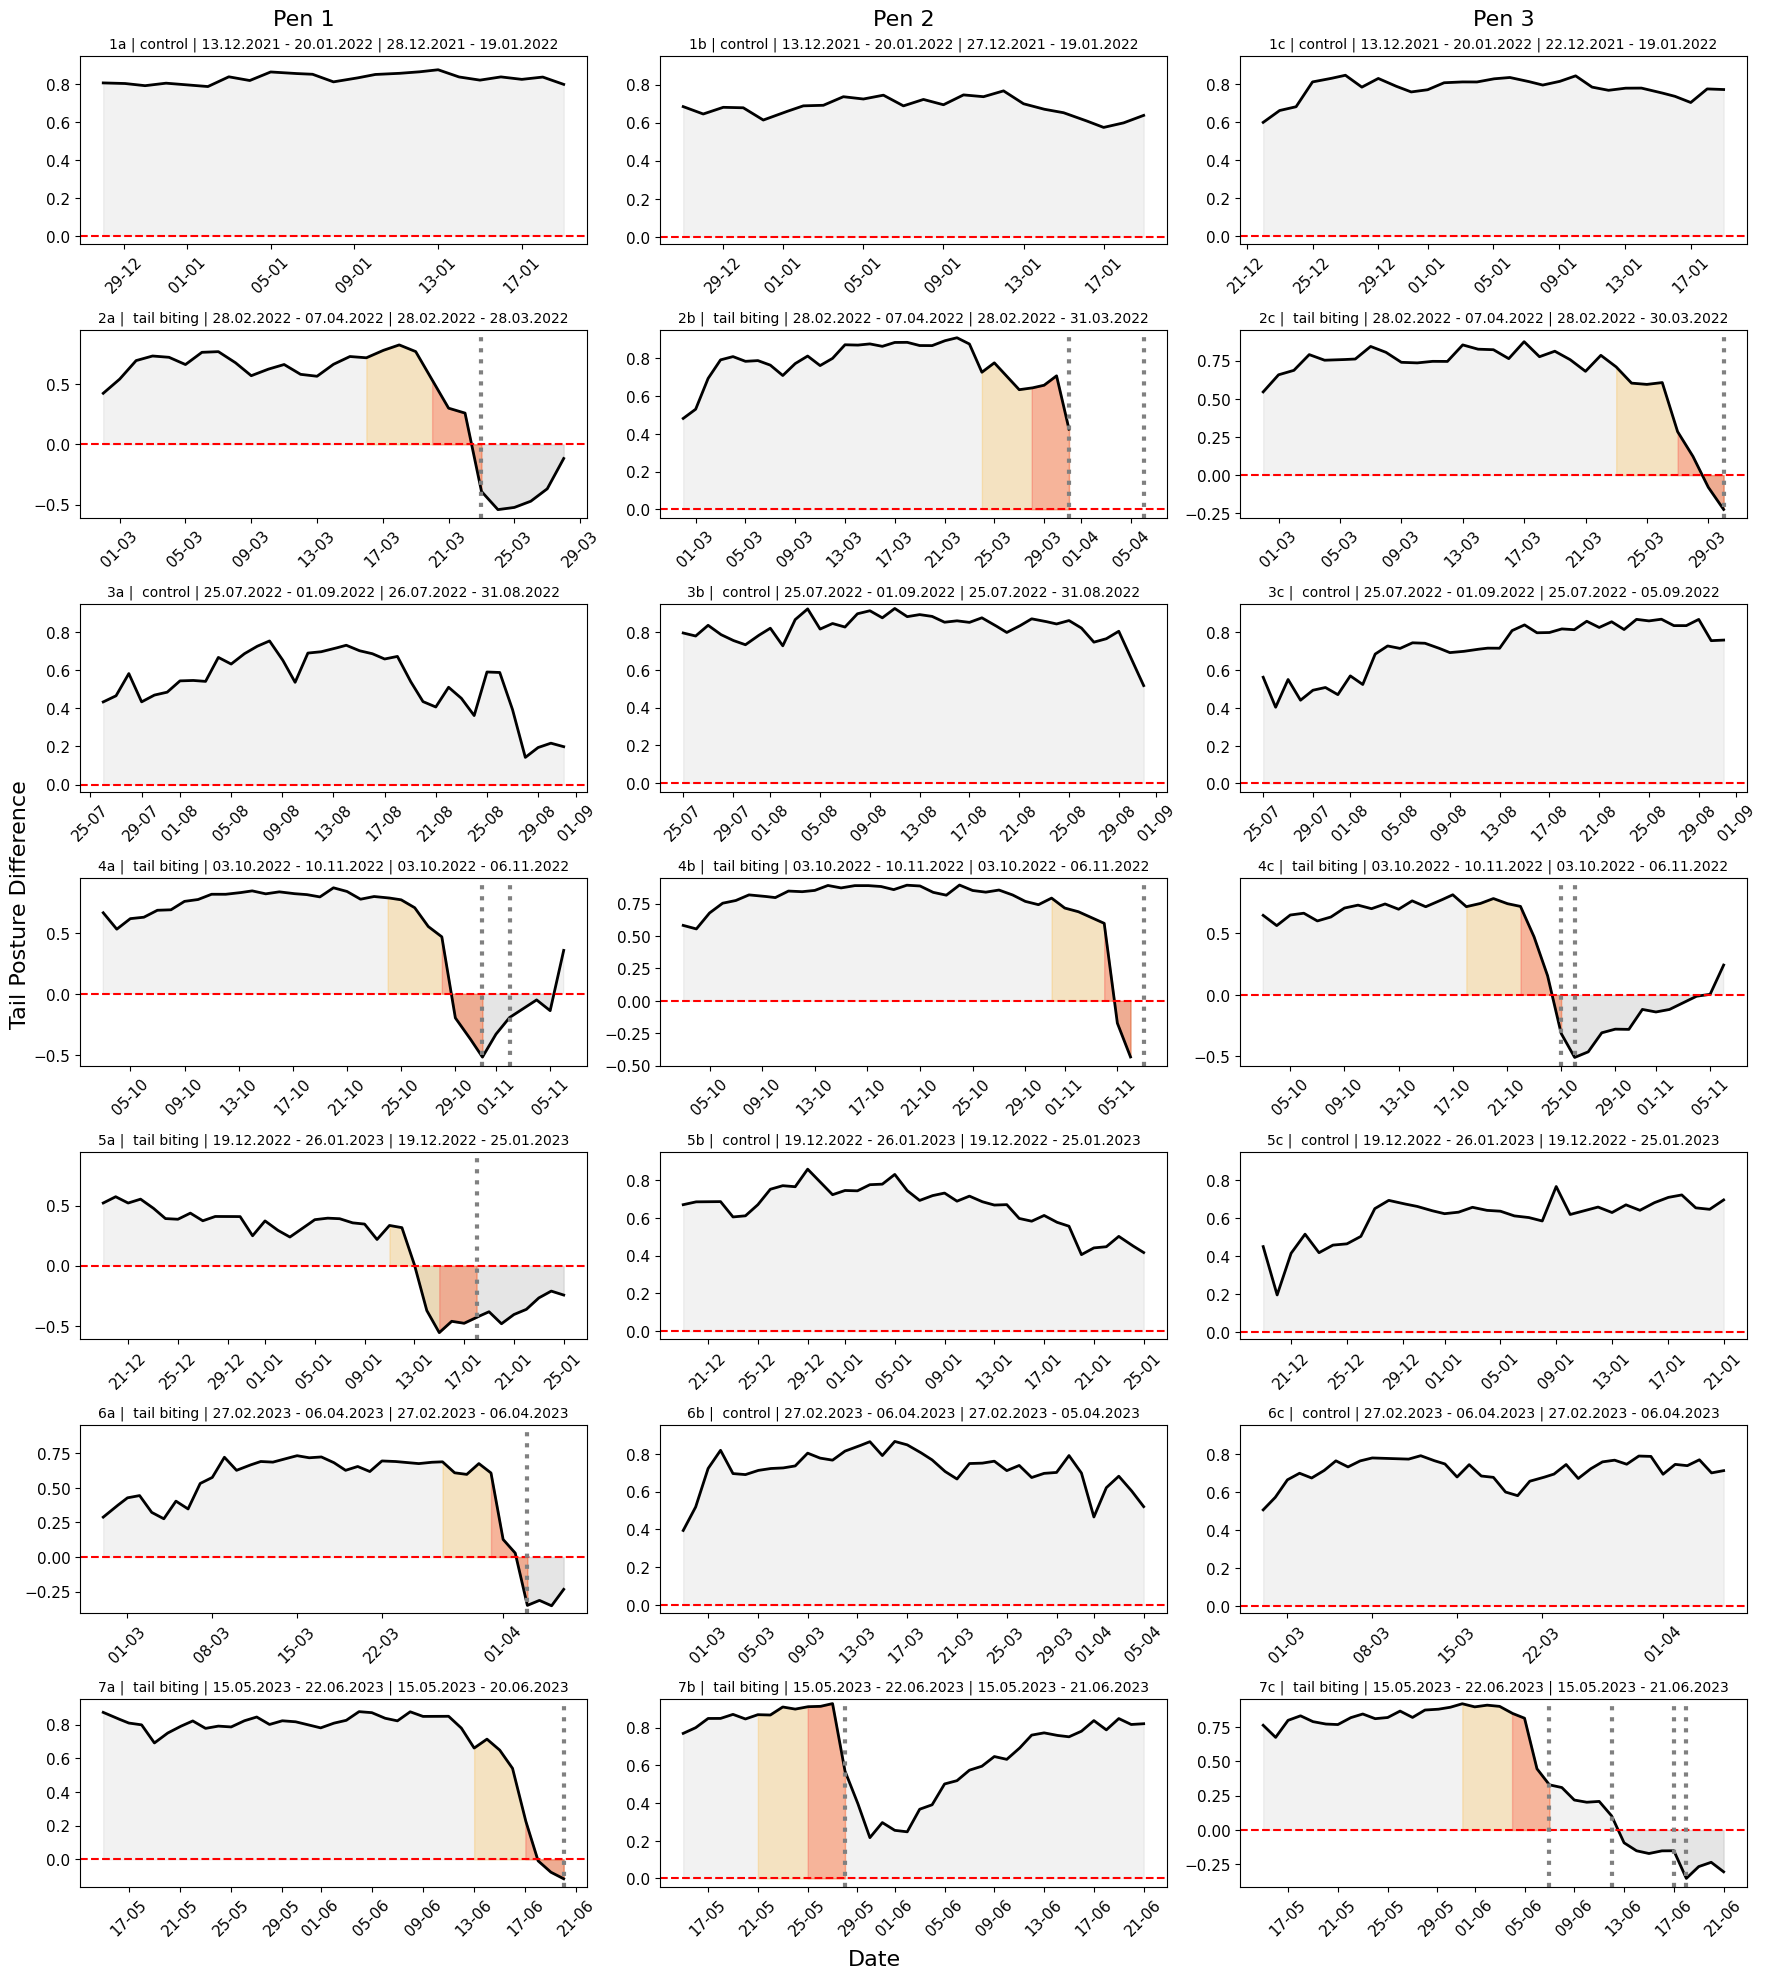

In [10]:
generate_tail_posture_subplots(pipeline_monitoring_results, [
                               "Kamera1", "Kamera2", "Kamera3"], path_to_piglet_rearing_info, resample_freq="D", skip_datespans=["220509_220616"], normalize=True, rolling_window=None, save_path="/Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/plots/test_plots/ECPLF_plot.pdf")

In [7]:
posture_diff_changes = tail_posture_changes_to_df(pipeline_monitoring_results, path_to_piglet_rearing_info, normalize=True, filter_cameras=["Kamera1", "Kamera2", "Kamera3"])
posture_diff_changes

,camera,date_span,culprit_removal_date,score_at_removal,score_7_days_prior,num_tails_upright_at_removal,num_tails_hanging_at_removal,num_tails_upright_7_days_prior,num_tails_hanging_7_days_prior
0,Kamera1,220228_220328,2022-03-23,-0.391144,0.718744,0.304428,0.695572,0.859372,0.140628
1,Kamera1,221003_221106,2022-10-31,-0.518169,0.785563,0.240916,0.759084,0.892782,0.107218
2,Kamera1,221219_230125,2023-01-18,-0.430174,0.334501,0.284913,0.715087,0.667250,0.332750
3,Kamera1,230227_230406,2023-04-03,-0.349031,0.687040,0.325484,0.674516,0.843520,0.156480
4,Kamera1,230515_230620,2023-06-20,-0.115502,0.660151,0.442249,0.557751,0.830076,0.169924
5,Kamera2,220228_220331,2022-03-31,0.424119,0.725955,0.712059,0.287941,0.862978,0.137022
6,Kamera2,221003_221106,2022-11-07,-0.433872,0.792146,0.283064,0.716936,0.896073,0.103927
7,Kamera2,230515_230621,2023-05-28,0.568833,0.868062,0.784417,0.215583,0.934031,0.065969
8,Kamera3,220228_220330,2022-03-30,-0.224863,0.707879,0.387569,0.612431,0.853939,0.146061
9,Kamera3,221003_221106,2022-10-25,-0.313017,0.714614,0.343491,0.656509,0.857307,0.142693


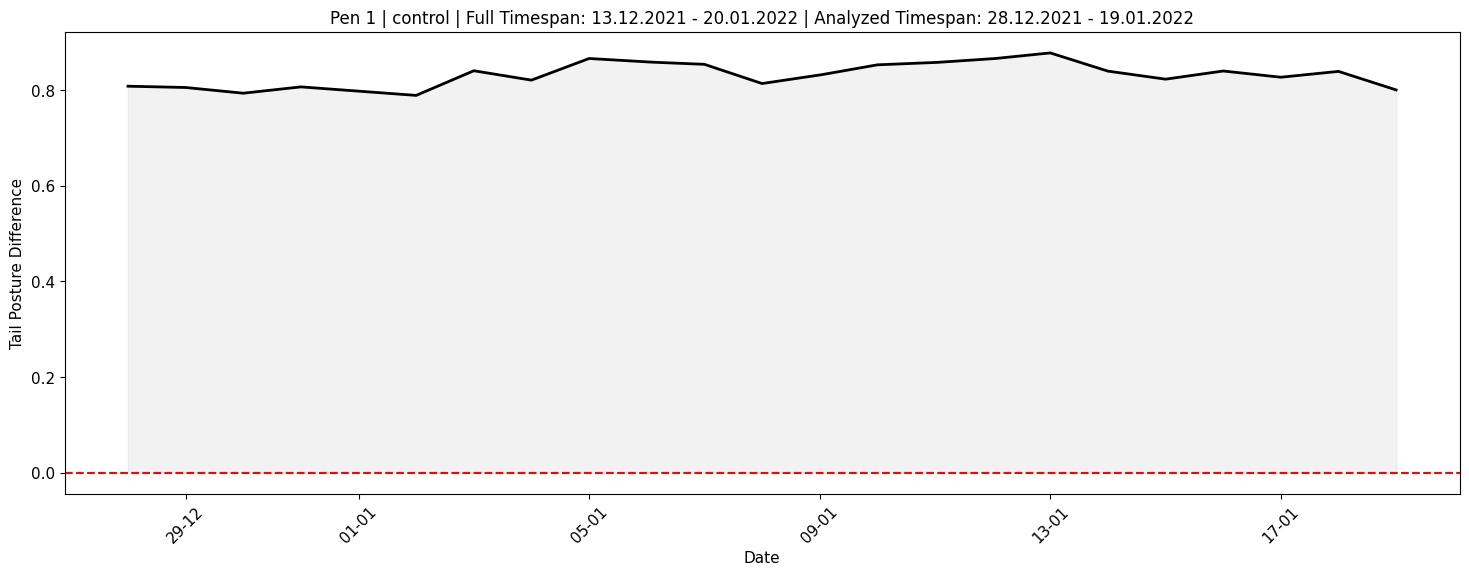

In [7]:
for result in pipeline_monitoring_results:
    analyze_tail_posture_changes(result, path_to_piglet_rearing_info,
                                resample_freq="D", normalize=True, rolling_window=None)
    break


### Save aggregated data


In [10]:
for result in pipeline_monitoring_results:
    aggregate_pipeline_montioring_results(
        result, path_to_result_data_aggregations=path_to_result_data_aggregations, normalize=True, resample_freq="D", rolling_window=None, save_data=True)

Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/211228_220119
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/220228_220328
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/220505_220530
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/220726_220831
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/221003_221106
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/pigle